In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model, Sequential

## Dados

In [3]:
y = np.array([x**2 for x in range(10000)])
x = np.array([x for x in range(10000)])

In [4]:
y

array([       0,        1,        4, ..., 99940009, 99960004, 99980001])

In [5]:
x

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [6]:
df = pd.concat([pd.DataFrame(x, columns=["x"]), pd.DataFrame(y, columns=["y"])], axis=1)

In [7]:
df.head()

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


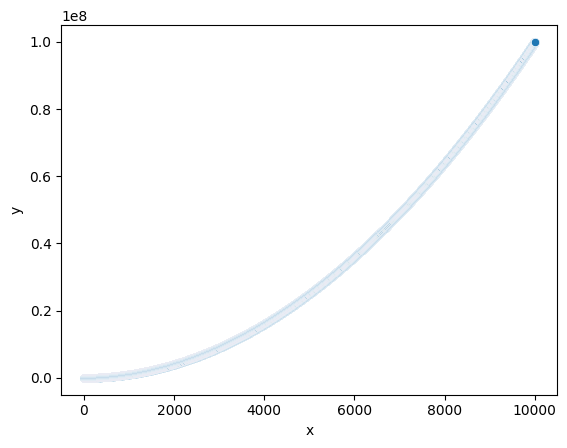

In [8]:
sns.scatterplot(data=df, x="x", y="y");

## Model

In [9]:
from sklearn.model_selection import train_test_split

In [28]:
x = np.array([x for x in range(10000)])
y = np.array([x**2 for x in range(10000)])

In [29]:
x

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [60]:
x_new = x.astype(np.float32)
y_new = y.astype(np.float32)

In [61]:
x_new = np.log(x_new)

C:\Users\franc\AppData\Local\Temp\ipykernel_10572\2050255199.py:1: RuntimeWarning: divide by zero encountered in log
  x_new = np.log(x_new)


In [62]:
#x_new = x / np.max(x)
#y_new = y / np.max(y)

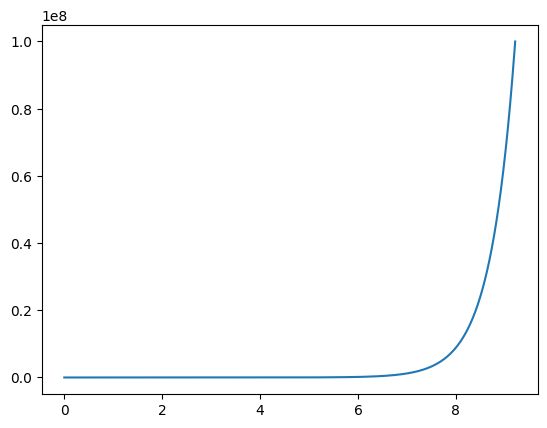

In [63]:
plt.plot(x_new, y_new)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

In [65]:
model = Sequential()
#model.add(Dense(10, input_shape=[1]))
#model.add(Dense(100, activation="ex"))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(1,input_dim=1, activation="exponential"))

In [66]:
model.compile(loss=keras.losses.mean_squared_error, metrics=[keras.metrics.R2Score()], optimizer="adam")

In [67]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 1950282237870080.0000 - r2_score: -1.1869 - val_loss: 1713592093114368.0000 - val_r2_score: -0.9555
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 382889690660864.0000 - r2_score: 0.5707 - val_loss: 479785091072.0000 - val_r2_score: 0.9995
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 458366779392.0000 - r2_score: 0.9995 - val_loss: 475687026688.0000 - val_r2_score: 0.9995
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 457904455680.0000 - r2_score: 0.9995 - val_loss: 475206287360.0000 - val_r2_score: 0.9995
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 455588151296.0000 - r2_score: 0.9995 - val_loss: 472941002752.0000 - val_r2_score: 0.9995
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 452958814208.0000 - r2_score: 0.9995 - val_loss: 468564705280.0000 - val_r2_score: 0.9995
Epo

<Axes: >

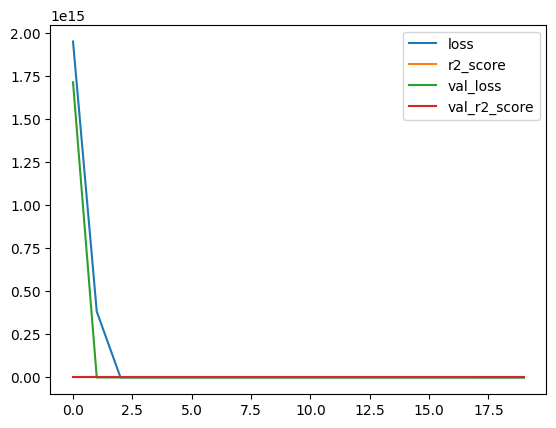

In [68]:
pd.DataFrame(history.history).plot()

In [51]:
model.predict(np.array([]))

1/1 [==============================] - 0s 112ms/step


array([[inf]], dtype=float32)

In [318]:
x_test = np.array([x for x in range(10000)])
x_test_normalized = x_test / np.max(x_test)
predictions_normalized = model.predict(x_test_normalized)

# Desnormalizando as previsões para comparação com os valores reais
predictions = predictions_normalized * np.max(y)

# Visualizando alguns resultados
for i in range(5):
    print(f"Valor real: {y[i]}, Previsão: {predictions[i][0]}")

313/313 [==============================] - 0s 986us/step
Valor real: 0, Previsão: 4461.2958984375
Valor real: 2, Previsão: 4465.02392578125
Valor real: 4, Previsão: 4468.7509765625
Valor real: 6, Previsão: 4472.47998046875
Valor real: 8, Previsão: 4476.20751953125


In [236]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(units=1, activation=tf.exp, input_shape=[1]) 
]) 
 
# Compile the model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=[keras.metrics.R2Score()]) 
 
# Train the model 
x_train = [1, 2, 3, 4, 5] 
y_train = [2.71828, 7.38906, 20.08554, 54.59815, 148.41316] 
model.fit(x_train, y_train, epochs=100) 
 
# Test the model 
x_test = [6, 7, 8] 
y_test = model.predict(x_test) 
print(y_test) 

Epoch 1/100
1/1 [==============================] - 1s 525ms/step - loss: 23011.6875 - r2_score: -6.8829
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 2739.4448 - r2_score: 0.0616
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 37.7157 - r2_score: 0.9871
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 315.4119 - r2_score: 0.8920
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 976.7871 - r2_score: 0.6654
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 1567.8252 - r2_score: 0.4629
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 2032.3512 - r2_score: 0.3038
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 2387.3774 - r2_score: 0.1822
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 2658.0090 - r2_score: 0.0895
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 2865.1028 - r2_score: 0.0185